In [87]:
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [33]:
eur_bonds = pd.read_excel("Europe_Green_Bonds_Issued.xlsx", sheet_name="Bonds_Values" )

In [34]:
# Add a column to also include the amount in Euros
# Since we know that stellantis has exactly 500M Euros, we will use this as a reference for our conversion
# Stellantis is the first row, and the amount out is the 11th indexed column
usd_per_eur = eur_bonds.iloc[0, 11]/500000000
usd_per_eur

1.08635

In [35]:
eur_bonds['Amt Issued (EUR)'] = eur_bonds['Amt Issued (USD)']/usd_per_eur
eur_bonds['Amt Out (EUR)'] = eur_bonds['Amt Out (USD)']/usd_per_eur

In [36]:
# Rearrange so the amounts are next to each other
var_list = ['Amt Out (EUR)', 'Amt Issued (EUR)', 'Amt Out (USD)', 'Amt Issued (USD)']
column_list = []

for var in var_list:
    column_list.append(eur_bonds.pop(var))

for idx, var in enumerate(var_list):
    eur_bonds.insert(11, var, column_list[idx])

In [37]:
# Replace the fields that did not load from bloomberg with at np.nan
eur_bonds.replace(to_replace="#N/A Field Not Applicable", value=nan, inplace=True)

In [38]:
eur_bonds.head()

,Issuer Name,Ticker,Moody Rtg,BBG Composite,Cntry of Incorp,Country/Region (Full Name),Maturity,Mty Type,Series,Currency,Cpn,Amt Issued (USD),Amt Out (USD),Amt Issued (EUR),Amt Out (EUR),ECBC Covered,Labeled Instrument Debut
0,Stellantis NV,STLA,Baa1,BBB+,NL,NETHERLANDS,2036-03-19,CALLABLE,EMTn,EUR,3.750,5.431750e+08,5.431750e+08,5.000000e+08,5.000000e+08,N,N
1,TenneT Holding BV,TENN,Baa3,BB+,NL,NETHERLANDS,NaN,PERP/CALL,NaN,EUR,4.875,5.971845e+08,5.971845e+08,5.497165e+08,5.497165e+08,N,N
2,Iceland Government International Bond,ICELND,A2,A,IS,ICELAND,2034-03-21,AT MATURITY,NaN,EUR,3.500,8.143425e+08,8.143425e+08,7.496134e+08,7.496134e+08,N,Y
3,E.ON SE,EOANGR,Baa2,BBB+,DE,GERMANY,2044-03-25,CALLABLE,EMTN,EUR,4.125,1.083650e+09,1.083650e+09,9.975146e+08,9.975146e+08,N,N
4,TenneT Holding BV,TENN,Baa3,BB+,NL,NETHERLANDS,NaN,PERP/CALL,*,EUR,4.625,5.971845e+08,5.971845e+08,5.497165e+08,5.497165e+08,N,N


### First we will take a look at the total amount of bonds issued and outstanding per country, without removing unlabelled bonds

<Axes: xlabel='Country/Region (Full Name)'>

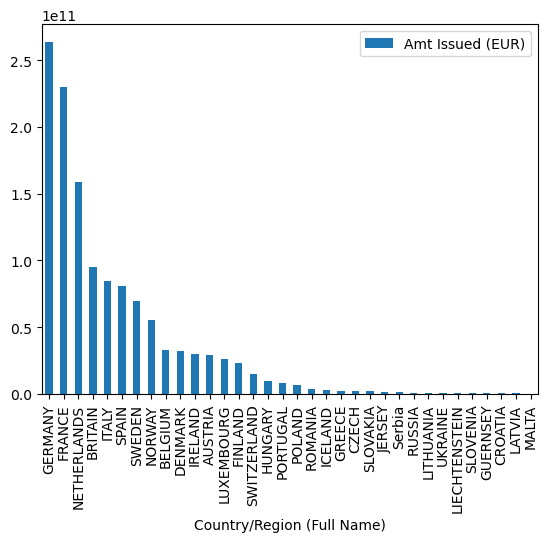

In [46]:
eur_bonds.groupby("Country/Region (Full Name)")[['Amt Issued (EUR)']].sum().sort_values('Amt Issued (EUR)', ascending=False).plot(kind='bar')

In [53]:
bonds_labelled = eur_bonds.groupby(["Labeled Instrument Debut"])[['Amt Issued (EUR)']].sum()
bonds_labelled

,Amt Issued (EUR)
Labeled Instrument Debut,
N,8.791603e+11
Y,3.892020e+11


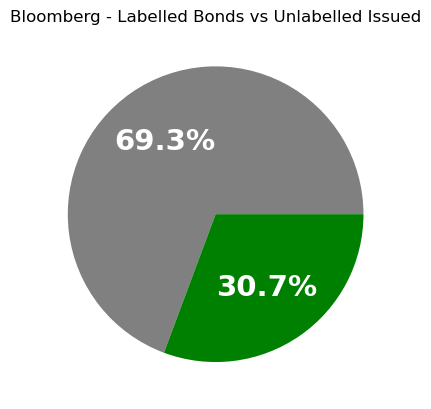

In [60]:
# Plotting pie chart
colors = ['grey', 'green'] 
textprops = {'color': 'white', 'weight': 'bold', 'fontsize': 21}

plt.pie(bonds_labelled['Amt Issued (EUR)'], labels=bonds_labelled.index, colors=colors, autopct='%1.1f%%', textprops=textprops)
plt.title('Bloomberg - Labelled Bonds vs Unlabelled Issued')
plt.show()

In [61]:
# Now the same thing but seperate the labelled bonds from the unlabelled ones using the Labeled instrument debut
country_bonds_labelled = eur_bonds.groupby(["Country/Region (Full Name)", "Labeled Instrument Debut"], as_index=False)[['Amt Issued (EUR)']].sum()

In [90]:
country_bonds_labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country/Region (Full Name)  59 non-null     object 
 1   Labeled Instrument Debut    59 non-null     object 
 2   Amt Issued (EUR)            59 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


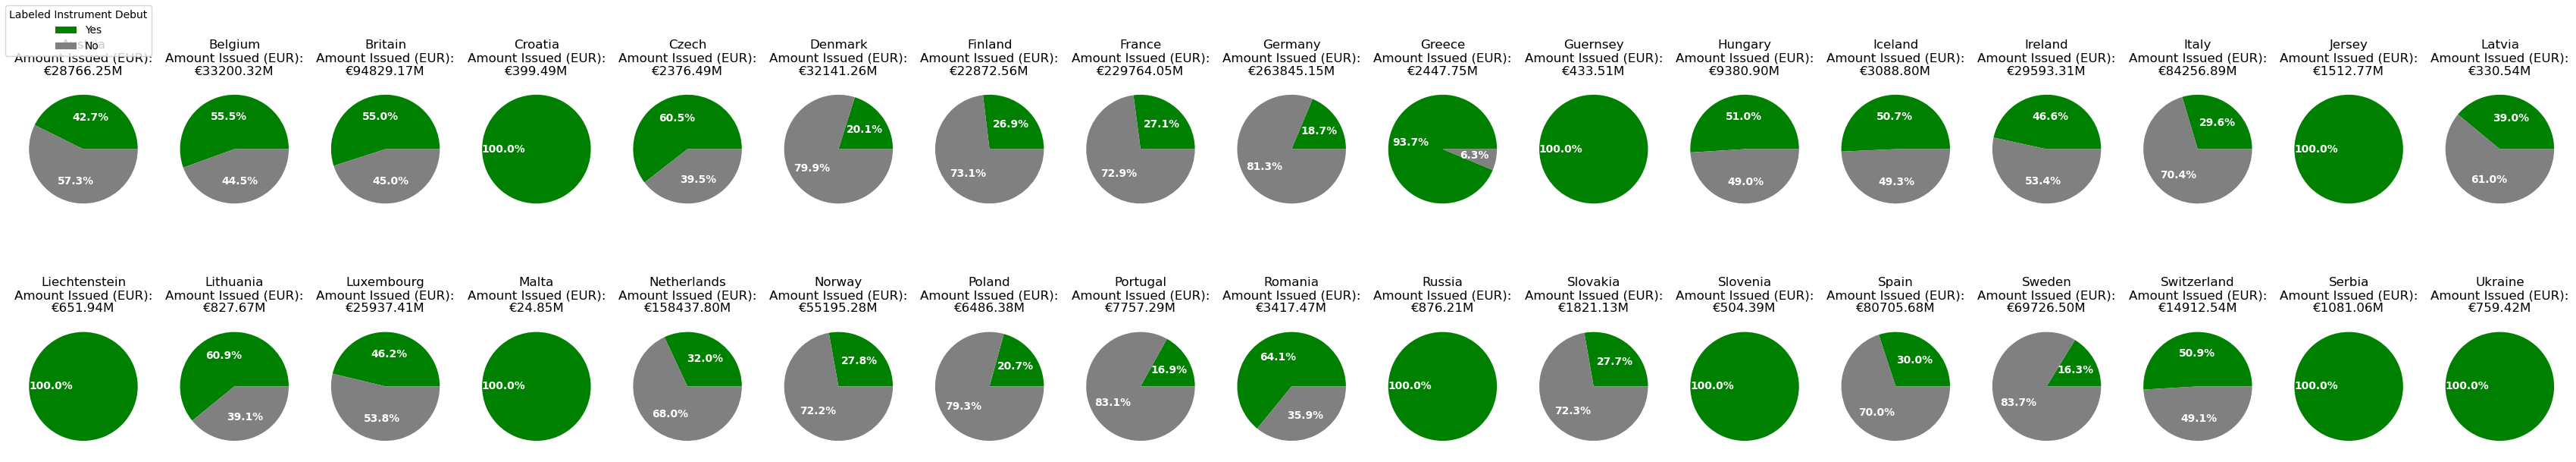

In [102]:
plt.figure(figsize=(34, 7))
countries = country_bonds_labelled['Country/Region (Full Name)'].unique()

for i, country in enumerate(countries, start=1):
    country_data = country_bonds_labelled[country_bonds_labelled['Country/Region (Full Name)'] == country]
    
    # Sort 'Labeled Instrument Debut' to ensure consistent color mapping
    country_data = country_data.sort_values('Labeled Instrument Debut', ascending=False)
    total_amt_issued_millions = country_data['Amt Issued (EUR)'].sum()/10**6
    colors = ['green' if x == 'Y' else 'grey' for x in country_data['Labeled Instrument Debut']]
    
    plt.subplot(2, 17, i)
    
    plt.pie(country_data['Amt Issued (EUR)'], labels=country_data['Labeled Instrument Debut'], colors=colors, autopct='%1.1f%%', textprops={'color': 'white', 'weight': 'bold', 'fontsize': 10})
    plt.title(f'{country.title()}\nAmount Issued (EUR):\n€{total_amt_issued_millions:.2f}M')

plt.tight_layout()

# Adding a legend for the colors
legend_elements = [Patch(facecolor='green', label='Yes'),
                   Patch(facecolor='grey', label='No')]
plt.figlegend(handles=legend_elements, loc='upper left', title="Labeled Instrument Debut")

plt.show()